# 0.0 Importar pacotes

In [1]:
from matplotlib import gridspec
from datetime import datetime
from ipywidgets import fixed
from tabulate import tabulate
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import tqdm
import ipywidgets as widgets
import seaborn as sns
import matplotlib.ticker as mtick


/home/user/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 0.1 Funções Auxiliares

In [2]:
pd.options.display.float_format = '{:.2f}'.format
    

plt.rcParams['figure.figsize'] = (11,7)

warnings.filterwarnings('ignore')

# 1.0 Dados

## 1.1 Importando dataset

In [3]:
df = pd.read_csv('dataset/kc_house_data.csv')

## 1.2 Dimensão dos dados

In [4]:
print('Número de linha:', df.shape[0])

print('Número de colunas:', df.shape[1])

Número de linha: 21613
Número de colunas: 21


## 1.3 Tipos de variáveis

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.4 Alterando os tipos de variáveis

In [6]:
df['date'] = pd.to_datetime(df['date']) 


## 1.5 Limpeza de dados

## 1.6 Criação de novas features

In [7]:
df['construcao'] = df['yr_built'].apply(lambda x: '> 1955' if x > 1955
                                                               else '< 1955')

df['porao'] = df['sqft_basement'].apply(lambda x: 'nao' if x == 0
                                                  else 'sim')

df['mes'] = df['date'].dt.month
df['ano'] = df['date'].dt.year

df['renovacao'] = df['yr_renovated'].apply(lambda x: 'sim' if x > 0 else
                                                     'nao'   )

df['banheiro'] =  df['bathrooms'].apply(lambda x: '0-3' if (x > 0 ) & (x < 3) else
                                                   '3-5' if (x > 3) & (x < 5) else
                                                   '5-8')


        
        
df['season'] = df['mes'].apply(lambda x: 'summer' if (x > 5) & (x < 8) else
                                           'spring' if (x > 2) & (x < 5) else
                                           'fall' if (x > 8) & (x < 12) else
                                           'winter') 

### 1.5.1 Duplicatas

In [8]:
df.sort_values('id').head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,construcao,porao,mes,ano,renovacao,banheiro,season
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,...,-122.21,2060,7316,> 1955,nao,4,2015,nao,5-8,spring
2496,1000102,2014-09-16,280000.00,6,3.00,2400,9373,2.00,0,0,...,-122.21,2060,7316,> 1955,nao,9,2014,nao,5-8,fall
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,...,-122.35,2590,21891,< 1955,sim,5,2014,nao,0-3,winter
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,...,-122.35,2250,20023,< 1955,nao,8,2014,nao,0-3,winter
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,...,-122.27,1290,10320,< 1955,sim,4,2015,nao,0-3,spring


In [9]:
df = df.drop_duplicates(subset = ['id'], keep = 'last')

df.sort_values('id').head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,construcao,porao,mes,ano,renovacao,banheiro,season
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,...,-122.21,2060,7316,> 1955,nao,4,2015,nao,5-8,spring
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,...,-122.35,2590,21891,< 1955,sim,5,2014,nao,0-3,winter
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,...,-122.35,2250,20023,< 1955,nao,8,2014,nao,0-3,winter
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,...,-122.27,1290,10320,< 1955,sim,4,2015,nao,0-3,spring
3557,3600057,2015-03-19,402500.00,4,2.00,1650,3504,1.00,0,0,...,-122.29,1480,3504,< 1955,sim,3,2015,sim,0-3,spring


### 1.5.1 Check NA

In [10]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
construcao       0
porao            0
mes              0
ano              0
renovacao        0
banheiro         0
season           0
dtype: int64

### 1.5.2 Estatística descritiva

In [11]:
df = df.copy()

In [12]:
#Incluindo somente variáveis numéricas
atri_num = df.select_dtypes(include = ['int64', 'float64'])

#deletando a coluna 'ID'
atri_num = atri_num.iloc[:, 1: ]


        atributos     media   mediana       std      min        max
0           price 541649.96 450000.00 367306.36 75000.00 7700000.00
1        bedrooms      3.37      3.00      0.93     0.00      33.00
2       bathrooms      2.12      2.25      0.77     0.00       8.00
3     sqft_living   2082.70   1920.00    919.13   290.00   13540.00
4        sqft_lot  15135.64   7614.00  41537.65   520.00 1651359.00
5          floors      1.50      1.50      0.54     1.00       3.50
6      waterfront      0.01      0.00      0.09     0.00       1.00
7            view      0.24      0.00      0.77     0.00       4.00
8       condition      3.41      3.00      0.65     1.00       5.00
9           grade      7.66      7.00      1.17     1.00      13.00
10     sqft_above   1790.96   1560.00    829.01   290.00    9410.00
11  sqft_basement    291.74      0.00    442.77     0.00    4820.00
12       yr_built   1971.10   1975.00     29.38  1900.00    2015.00
13   yr_renovated     84.73      0.00    402.42 

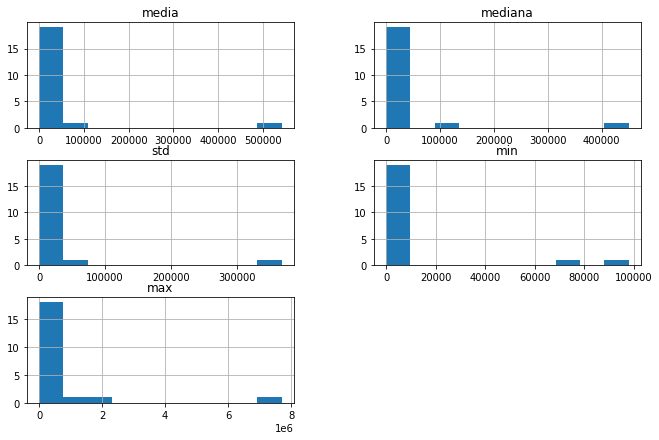

In [13]:
#análise descritiva
#medidas de tendencia central
df_mean =  pd.DataFrame(atri_num.apply(np.mean)).T
df_median = pd.DataFrame(atri_num.apply(np.median)).T

#medidas de dispersão 
df_std = pd.DataFrame(atri_num.apply(np.std)).T
df_min = pd.DataFrame(atri_num.apply(np.min)).T
df_max = pd.DataFrame(atri_num.apply(np.max)).T


#concatenando
est = pd.concat( [df_mean, df_median,  df_std, df_min, df_max ] ).T.reset_index()



#alterando o nome das colunas
est.columns = [ 'atributos','media', 'mediana', 'std', 'min', 'max']
print(est)
est.hist();


In [14]:
#substituindo o valor de 33 na coluna bedrooms por 3
linha = df[df['bedrooms'] == 33]

df = df.drop(15870)

df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

# 2.0 Exploração de dados

## Correlação

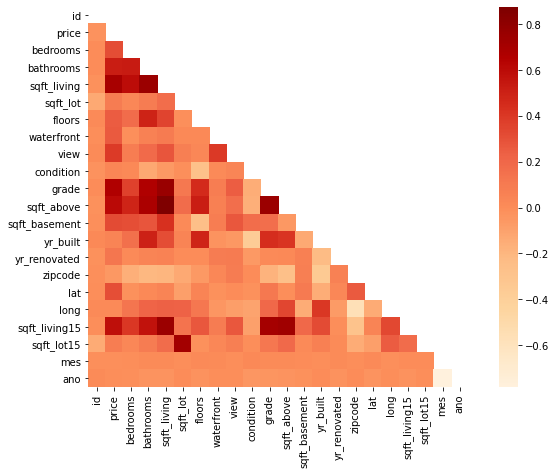

In [15]:
matrix = np.triu(df.corr())

sns.heatmap(df.corr(), cmap = 'OrRd', square = True, annot = False, center = 0,
             mask = matrix);




## 2.1 Insights

In [16]:
df = df.copy()

In [17]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
construcao               object
porao                    object
mes                       int64
ano                       int64
renovacao                object
banheiro                 object
season                   object
dtype: object

### **H1:**   Imóveis com vista para a água são em média 30% mais caros

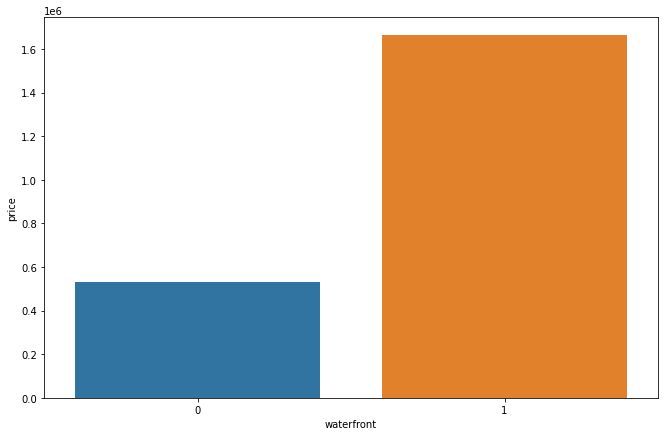

In [18]:
h1 = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

h1['waterfront'] = h1['waterfront'].astype(str)

sns.barplot(h1['waterfront'], h1['price']);





### H2: Imóveis com data de construção menor que 1955 são em média 50% mais baratos.


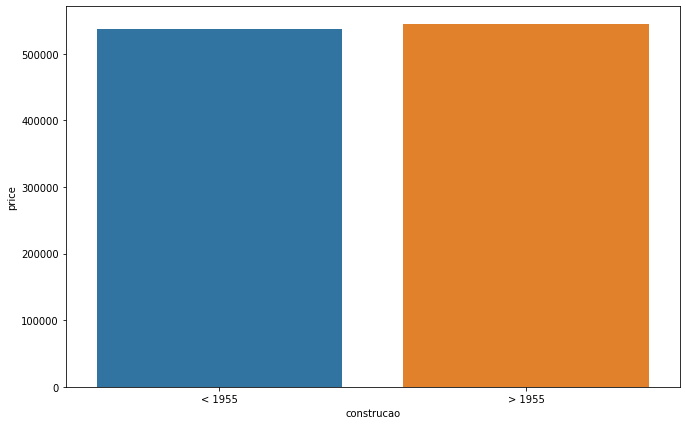

In [19]:
h2 = df[['construcao', 'price']].groupby('construcao').mean().reset_index()

sns.barplot(h2['construcao'], h2['price']);

### H3: Imóveis sem porão possuem área total (sqrt_lot) são 40% maiores do que imóveis com 	porões.


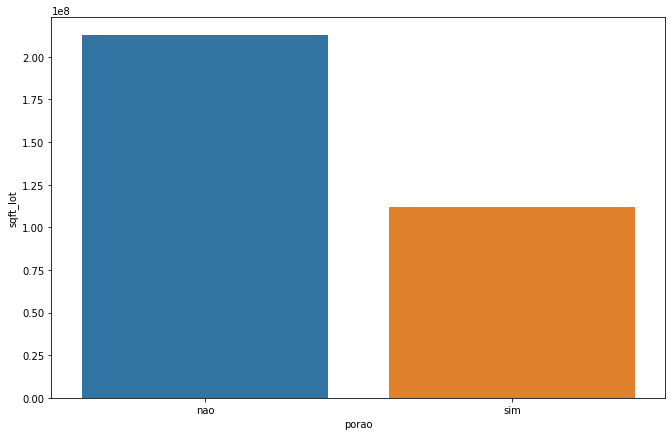

In [20]:
h3 = df[['porao', 'sqft_lot', 'price']].groupby('porao').sum().reset_index()

h3
sns.barplot(h3['porao'], h3['sqft_lot']);

### H4: O crescimento do preço dos imóveis ano após ano (YoY) é de 10%


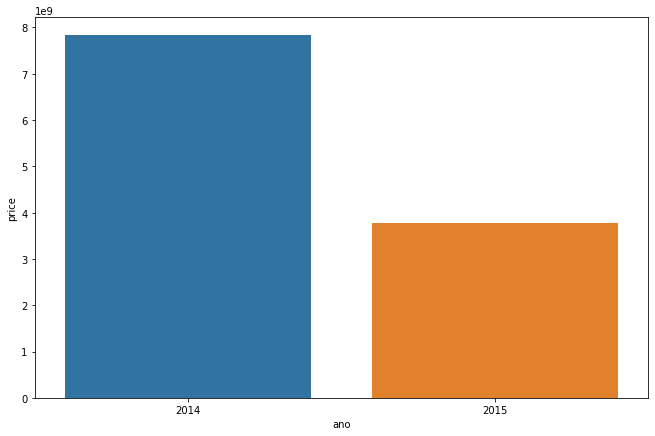

In [21]:
h4 = df[['price', 'ano']].groupby('ano').sum().reset_index()

h4['ano'] = h4['ano'].astype(str)

sns.barplot(h4['ano'], h4['price']);

### H4.1: O crescimento do preço dos imóveis MoM é de 10%

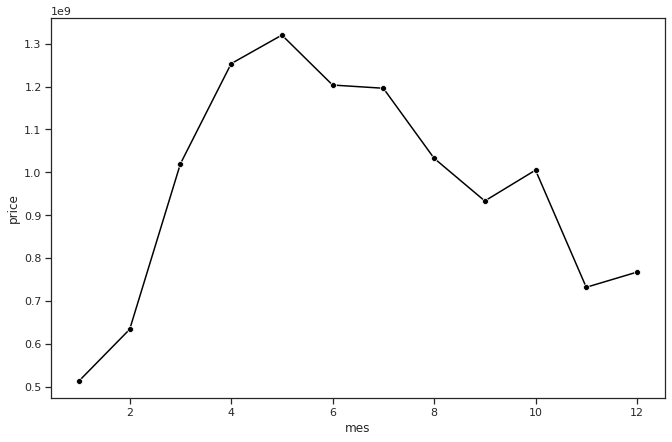

In [22]:
h41 =  df[['mes', 'price']].groupby('mes').sum().reset_index()

sns.set_theme(style="ticks")
sns.set_context('notebook')
sns.lineplot(data = h41, x = 'mes',  y = 'price', 
             markers = True, style = (1), legend = False, 
             color = 'black');


###  H5: Imóveis com 3 banheiros tem um crescimento mês após mês (MoM) de 15%.


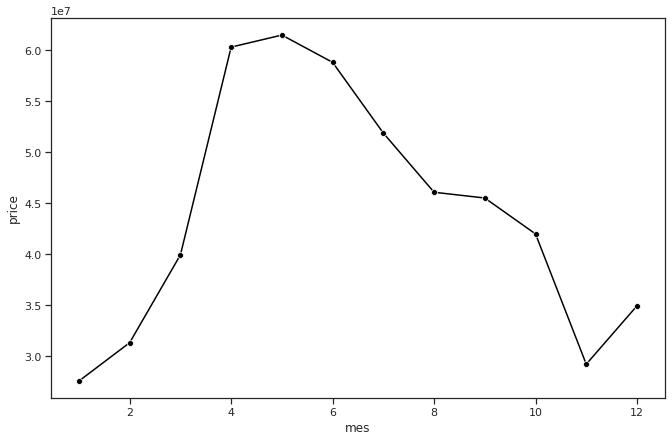

In [23]:


h5 = df[(df['bathrooms'] == 3)]

h5 = h5[['mes', 'price']].groupby('mes').sum().reset_index()


sns.lineplot(data = h5, x = 'mes', y = 'price', markers = True, style = (1), legend = False, color = 'black');




### H6: Imóveis que nunca foram reformadas (yr_renovated == 0) são em média 20% mais baratos. 


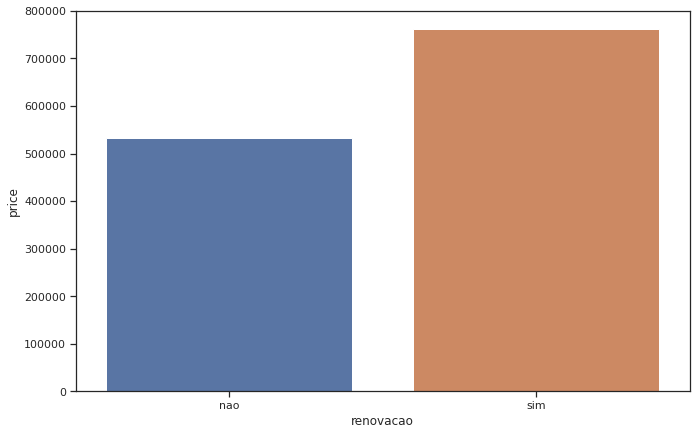

In [24]:
h6 = df[['price', 'renovacao']].groupby('renovacao').mean().reset_index()

sns.barplot(h6['renovacao'], h6['price']);

### H7: Imóveis em más condições mas com boa vista (view) são 10% mais caros.


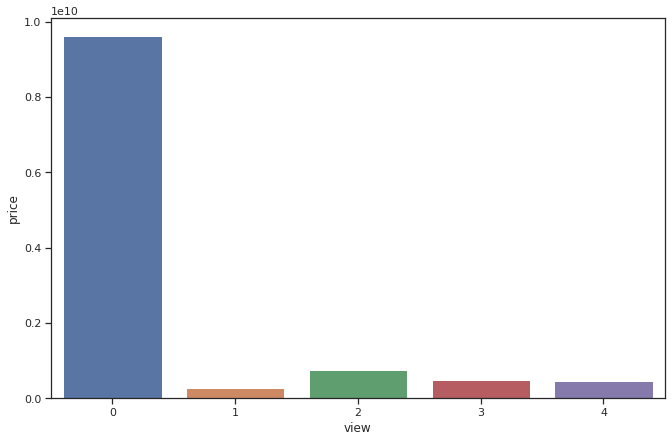

In [25]:
h71 = df[df['condition'] == 1]
h7 = df[['price', 'view']].groupby('view').sum().reset_index()

sns.barplot(h7['view'], h7['price']);


### H8: Imóveis antigos e não renovados são 40% mais baratos. 


<AxesSubplot:xlabel='construcao', ylabel='price'>

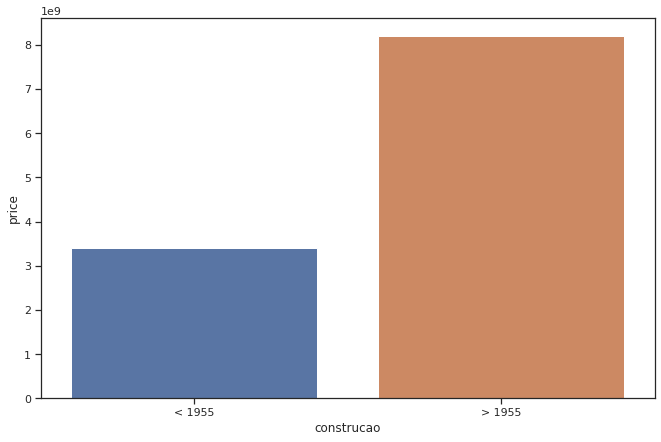

In [26]:
h8 = df[df['renovacao'] == 1]

h8 = df[['construcao', 'price']].groupby('construcao').sum().reset_index()


sns.barplot(x ='construcao', y = 'price', data = h8 )

### H9: Imóveis com mais banheiros são em média 5% mais caros.


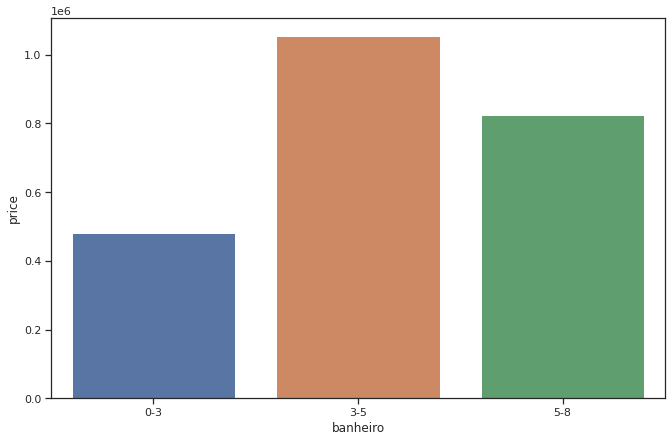

In [27]:
h9 = df[['banheiro', 'price', 'sqft_lot']].groupby('banheiro').mean().reset_index()

sns.barplot(x = 'banheiro', y = 'price', data = h9);

### H10: Imóveis renovados recentemente são 35% mais caros.

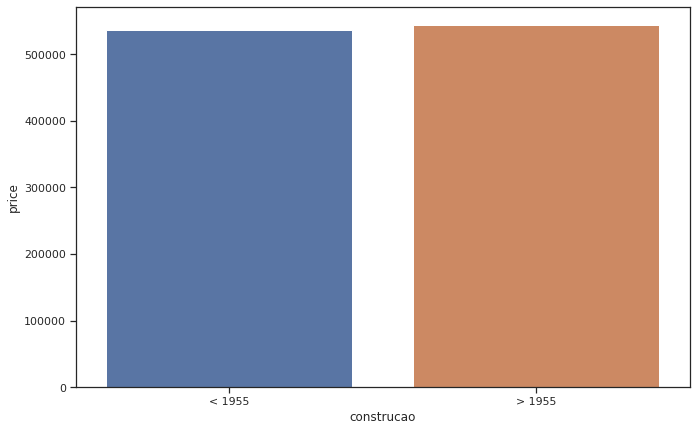

In [28]:
h10 = df[['construcao', 'price']].groupby('construcao').mean().reset_index()

sns.barplot(x = 'construcao', y = 'price', data = h10);

# 3.0 Questão de negócio



## 3.1 Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [ ]:
df = df.copy()

### 3.1.1 Quais casas

In [29]:
a = df[['zipcode', 'price']].groupby('zipcode').median().reset_index()


df2 = pd.merge(a, df, on='zipcode', how = 'inner')


df2 = df2.rename(columns = {'price_y' : 'price', 'price_x' : 'price_median'} ) #alterando nome das colunas

for i, row in df2.iterrows():
    if (row['price_median'] >= row['price']) & (row['condition'] < 3):
        df2.loc[i,'pay'] =  'sim'
    else:
        df2.loc[i, 'pay'] = 'nao'

In [30]:
#Casas para comprar
compra = df2[df2['pay'] == 'sim']

compra['pay'].shape[0]
compra[['id', 'price', 'pay']]




,id,price,pay
0,7895500070,240000.00,sim
103,5706600170,204900.00,sim
229,3599600276,215500.00,sim
605,5152600090,235500.00,sim
1089,2425700022,425000.00,sim
...,...,...,...
20186,1670400090,182000.00,sim
20611,7812800155,170000.00,sim
20656,1180002580,180000.00,sim
21014,7686205370,260000.00,sim


In [31]:
fil_zip = widgets.Dropdown(options = df2['pay'].unique().tolist(),
                       description = 'regiao',
                       disabled = False)


def  update_map (df3, fil_zip):
    house = df2[(df2['pay'] == fil_zip)][['id', 'lat', 'long', 'condition', 'pay', 'price']] 

    mapa = px.scatter_mapbox(house, lat = 'lat', lon = 'long',  
                         size = 'price',
                         color = 'condition', opacity = 0.5, zoom = 10 )
    

    mapa.update_layout( mapbox_style = 'open-street-map')
    mapa.update_layout( height = 600, margin = {'b':0, 't':0, 'r':0, 'l': 0})
    mapa.show()
    

    
widgets.interactive( update_map, df3 = fixed(df2), fil_zip  = fil_zip)

interactive(children=(Dropdown(description='regiao', options=('sim', 'nao'), value='sim'), Output()), _dom_cla…

## 3.2 Uma vez comprado, qual é o melhor momento para vendê-lo e por qual preço?

In [32]:
df3 = df2.copy()


df3 = df3[df3['pay'] == 'sim']

df4 = df3[['season', 'zipcode', 'price']].groupby(['zipcode', 'season']).median().reset_index()

df4 = df4.rename(columns = {'price' : 'price_medi_season', 'season': 'season_median'} ) 

df5 = pd.merge(df3, df4, on='zipcode', how = 'inner')

for i, row in df5.iterrows():
    if (row['price_medi_season'] > row['price']):
        df5.loc[i, 'sale'] =  row['price'] * 1.1
    else:
        df5.loc[i, 'sale'] = row['price'] * 1.3


In [33]:
lista2 = df5['season'].tolist()
df5[['season', 'price', 'id', 'sale']]

,season,price,id,sale
0,winter,240000.00,7895500070,312000.00
1,winter,240000.00,7895500070,312000.00
2,winter,240000.00,7895500070,312000.00
3,spring,204900.00,5706600170,225390.00
4,spring,204900.00,5706600170,266370.00
...,...,...,...,...
363,spring,180000.00,1180002580,234000.00
364,fall,260000.00,7686205370,338000.00
365,fall,260000.00,7686205370,338000.00
366,winter,235000.00,7205400180,258500.00


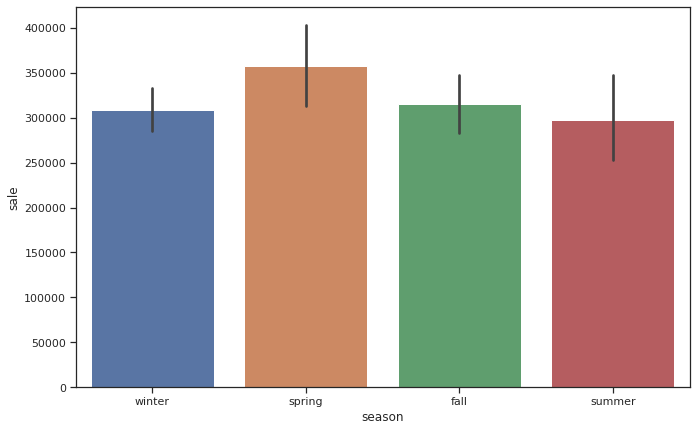

In [34]:
a = df5[['price_medi_season', 'price', 'sale', 'price_median', 'season', 'zipcode']]
a
sns.barplot(data = a, x = 'season', y = 'sale');

### 3.2.1 Resultado do negócio

In [41]:
df5 ['lucro'] = df5['sale'] - df5['price']


In [42]:
df5['lucro'].sum()

22623548.200000003

In [36]:
values = [['Hipótese','Parecer','Dizeres',],
['H1','Verdadeira','Imóveis com vista para água são mais caros',],
['H2','Falsa','Imóveis com data de construção não parece afetar o preço'],
['H3',
'Verdadeira',
'Imóveis sem porão possuem maior área total e são mais caros'],
['H4',
'Verdadeira',
'Imóveis sem reforma são mais baratos'],
['H5',
'Falso',
'Imóveis com más condições e com vista ruim são mais caros'],
['H6',
'Verdadeira',
'Imóveis antigos que não foram renovados são mais baratos'],
['H7',
'Falso',
'Imóveis que possuem entre 3 – 5 banheiros são mais caros'],
['H8',
'Falso',
'O tempo de renovação não parece influenciar no preço'],
['H9',
'Falso',
'Os imóveis  sofrem decaimento do preço em relação aos meses' ],
['H10',
'Falso',
'Imóveis com 3 banheiros sofrem decaimento do preço em relação aos meses']

          

 ]

print(tabulate (values, headers = 'firstrow'))

Hipótese    Parecer     Dizeres
----------  ----------  -----------------------------------------------------------------------
H1          Verdadeira  Imóveis com vista para água são mais caros
H2          Falsa       Imóveis com data de construção não parece afetar o preço
H3          Verdadeira  Imóveis sem porão possuem maior área total e são mais caros
H4          Verdadeira  Imóveis sem reforma são mais baratos
H5          Falso       Imóveis com más condições e com vista ruim são mais caros
H6          Verdadeira  Imóveis antigos que não foram renovados são mais baratos
H7          Falso       Imóveis que possuem entre 3 – 5 banheiros são mais caros
H8          Falso       O tempo de renovação não parece influenciar no preço
H9          Falso       Os imóveis  sofrem decaimento do preço em relação aos meses
H10         Falso       Imóveis com 3 banheiros sofrem decaimento do preço em relação aos meses
